In [4]:
path = 'C:/Users/hu612/Downloads/insightbook.opencv_project_python-master/insightbook.opencv_project_python-master/img/'

이미지에 연산을 적용해 새로운 정보를 얻으려고 할 때 전체 이미지를 연산하는 방법보다 관심이 있는 부분만 잘라서 하는 것이 훨씬 효과적이다. 관심 있는 영역만 잘라서 연산을 하면 연산할 데이터 양이 줄어들지만 알고리즘도 단순해지는 이점도 있다. 

**roi.py**

관심영역(ROI, Region Of Interset)를 numpy를 이용해서 슬라이싱해보자.

In [5]:
import cv2
import numpy as np

img = cv2.imread(path + 'sunset.jpg')

x=320; y=150; w=50; h=50        # roi 좌표
roi = img[y:y+h, x:x+w]         # roi 지정        ---①

print(roi.shape)                # roi shape, (50,50,3)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0)) # roi 전체에 사각형 그리기 ---②
cv2.imshow("img", img)

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

(50, 50, 3)
-1


**roi_copy.py**

지정한 관심영역을 하나 더 나타날 수 있게 해보자.

In [7]:
import cv2
import numpy as np

img = cv2.imread('../img/sunset.jpg')

x=320; y=150; w=50; h=50
roi = img[y:y+h, x:x+w]     # roi 지정
img2 = roi.copy()           # roi 배열 복제 ---①

img[y:y+h, x+w:x+w+w] = roi # 새로운 좌표에 roi 추가, 태양 2개 만들기
cv2.rectangle(img, (x,y), (x+w+w, y+h), (0,255,0)) # 2개의 태양 영역에 사각형 표시

cv2.imshow("img", img)      # 원본 이미지 출력
cv2.imshow("roi", img2)     # roi 만 따로 출력

cv2.waitKey(0)
cv2.destroyAllWindows()

**roi_crop_mouse.py**

마우스로 관심영역을 지정한다. 2장에서 살펴본 마우스 이벤트 처리를 통해 마우스로 관심영역을 저장하고 잘라낸 부분만 새 창으로 파일을 저장한다.

In [9]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값 

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread(path + 'sunset.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:308, y:197, w:19, h:38
croped.
x:455, y:71, w:36, h:68
croped.
x:373, y:61, w:49, h:134
croped.
x:225, y:112, w:40, h:98
croped.
x:129, y:150, w:43, h:123
croped.
x:100, y:40, w:352, h:233
croped.
x:313, y:147, w:48, h:20
croped.
x:403, y:198, w:0, h:0
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:157, y:84, w:-3, h:17
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:157, y:132, w:13, h:53
croped.
x:170, y:188, w:11, h:3
croped.
x:182, y:191, w:5, h:-3
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:195, y:165, w:1, h:-1
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:196, y:164, w:-144, h:-18
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:52, y:146, w:55, h:140
croped.
x:245, y:261, w:-220, h:-142
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:319, y:211, w:-280, h:-109
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:388, y:193, w:-261, h:-83
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:378, y:195, w:-318, h:-107
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:487, y:193, w:-404, h:-104
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:418, y:197, w:-311, h:-77
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:357, y:246, w:-240, h:-69
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.

여기서 이미지를 복제하지 않고 사용하면 누적되어서 그려진다. 따라서 복제해서 사용해야 한다.

**roi_select_img.py**

cv2에는 selectROI함수가 있다.

ret = selectROI([win_names,], img[,showCrossHair=True, fromCenter=False])

- win_name : ROI 선택을 진행할 창의 이름, str
- img : ROI 선택을 진행할 이미지, Numpy
- showCrossHiar : 선택 영역 중심에 십자 모양 표시 여부
- fromCenter : 마우스 시작 지점을 영역의 중심으로 지정
- ret : 선택한 영역 좌표와 크기(x, y, w, h)선택을 취소한 경우 모두 0, c를 누르면 취소

In [14]:
import cv2,  numpy as np

img = cv2.imread(path+'sunset.jpg')

x,y,w,h	=	cv2.selectROI('img', img, True) 
if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('./cropped2.jpg', roi)   # ROI 영역만 파일로 저장

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컬러 스페이스  


**rgba.py**

red green blue alpha(투명도)


In [16]:
import cv2
import numpy as np

# 기본 값 옵션
img = cv2.imread(path+'opencv_logo.png')   
# IMREAD_COLOR 옵션                   
bgr = cv2.imread(path+'opencv_logo.png', cv2.IMREAD_COLOR) # bgr    
# IMREAD_UNCHANGED 옵션
bgra = cv2.imread(path+'opencv_logo.png', cv2.IMREAD_UNCHANGED) # bgra
# 각 옵션에 따른 이미지 shape
print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

default (120, 98, 3) color (120, 98, 3) unchanged (120, 98, 4)


근데 거의 차이 없음, alpha는 mask channel이라고도 불린다.

**bgr2gray.py**

이미지 gray scale로 변경하기

In [17]:
import cv2
import numpy as np

img = cv2.imread('../img/girl.jpg')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.split() : 채널 분리 함수, 이미지에서 채널을 분리한다. <br>
cv2.COLOR_BGR2GRAY: BGR 색상 이미지를 회색조 이미지로 변환<br>
cv2.COLOR_GRAY2BGR: 회색조 이미지를 BGR 색상 이미지로 변환<br>
cv2.COLOR_BGR2RGB: BGR 색상 이미지를 RGB 색상 이미지로 변환<br>
cv2.COLOR_BGR2HSV: BGR 색상 이미지를 HSV 색상 이미지로 변환<br>
cv2.COLOR_HSV2BGR: HSV 색상 이미지를 BGR 색상 이미지로 변환<br>
cv2.COLOR_BGR2YUV: BGR 색상 이미지를 YUV 색상 이미지로 변환<br>
cv2.COLOR_YUV2BGR: YUB 색상 이미지를 BGR 색상 이미지로 변환<br>


**bgr2hsv.py**

In [10]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

#---② BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#---③ HSV로 변환한 픽셀 출력
print("red:",red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


- H : 이미지가 어떤 색상인지 나타내기(색조)
- S : 이미지의 색상이 얼마나 순수하게 포함되어 있는지 나타내기(채도)
- V : 색상의 밝기(명도)


- 색깔을 나타내기 위해서는 H만 건드리면 되기 때문에 편리하고 효과적이다.
- 빨강 : 165 ~ 180, 0~15
- 초록 : 45 ~ 75
- 파랑 : 90 ~ 120

**bgr2yuv.py**


- Y : 밝기
- U : 밝기와 파란색과의 색상 차(Cb)
- V : 밝기와 빨간색과의 색상 차(Cr)

- Y에는 많은 비트 수를 할당하고 U(Cb), V(Cr)는 적은 비트 수를 할당하여 데이터를 압축하는 효과를 가질 수 있는 컬러입니다.

In [11]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 3가지 밝기의 픽셀 생성
dark = np.array([[[0,0,0]]], dtype=np.uint8)        # 3 채널 모두 0인 가장 어두운 픽셀
middle = np.array([[[127,127,127]]], dtype=np.uint8) # 3 채널 모두 127인 중간 밝기 픽셀
bright = np.array([[[255,255,255]]], dtype=np.uint8) # 3 채널 모두 255인 가장 밝은 픽셀

#---② BGR 컬러 스페이스를 YUV 컬러 스페이스로 변환
dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

#---③ YUV로 변환한 픽셀 출력
print("dark:",dark_yuv)
print("middle:", middle_yuv)
print("bright", bright_yuv)

dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright [[[255 128 128]]]


- 밝기에 조금 더 신경을 써야 한다면 YUV 방식을 사용하는걸 추천한다.

**thresholds.py**

- 스레시홀딩 : 어떤 임계값을 정한 뒤 픽셀 값이 임계값을 넘으면 255, 안넘으면 0으로 지정하는 방식을 의미합니다.
- numpy로 연산할 수 있지만 cv2.threshold() 함수로 구현할 수도 있습니다.

127.0


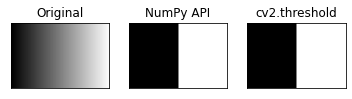

In [22]:
import cv2 
import numpy as np 
import matplotlib.pylab as plt 
img = cv2.imread('../img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) 
#이미지를 그레이 스케일로 읽기 
# --- ① NumPy API로 바이너리 이미지 만들기 
thresh_np = np.zeros_like(img) # 원본과 동일한 크기의 0으로 채워진 이미지 
thresh_np[img > 127] = 255 # 127 보다 큰 값만 255로 변경 
# ---② OpenCV API로 바이너리 이미지 만들기 
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
print(ret) # 127.0, 바이너리 이미지에 사용된 문턱 값 반환 
# ---③ 원본과 결과물을 matplotlib으로 출력 
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv} 
for i , (key, value) in enumerate(imgs.items()): 
    plt.subplot(1, 3, i+1) 
    plt.title(key) 
    plt.imshow(value, cmap='gray') 
    plt.xticks([]); plt.yticks([]) 
    
    
plt.show()

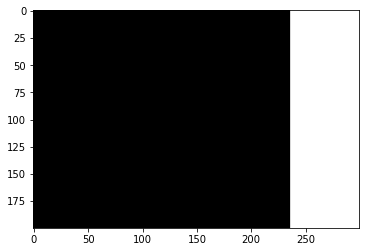

In [23]:
thresh_np = np.zeros_like(img)
thresh_np[img > 200] = 255
import matplotlib.pylab as plt
plt.imshow(thresh_np, cmap='gray')

**threshold_flag.py**

cv2.threshold 함수의 옵션을 이용해보자.

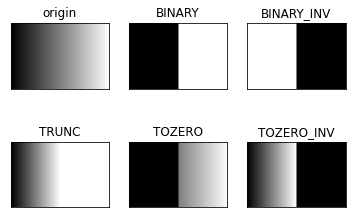

In [13]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()


**threshold_otsu.py**

오츠이 알고리즘 적용 : 임계값을 임의로 정해 픽셀을 두 부류로 나누고 두 부류의 명암 분포를 구하는 작업을 반복한다. 모든 경우의 수 중에서 두 부류의 명암 분포가 가장 균일할 때의 임계값을 선택한다.

otsu threshold :  131.0


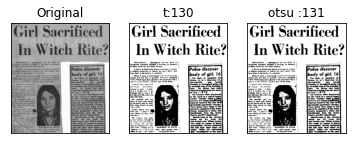

In [26]:
img = cv2.imread(path+'scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)
_,t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print('otsu threshold : ', t)

imgs = {'Original' : img,'t:130' : t_130, 'otsu :%d'%t : t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

오츠의 알고리즘의 단점은 시간이 오래 걸린다는 점과 노이즈가 많은 영상에서는 좋은 결과를 얻지 못한다는 점이다.

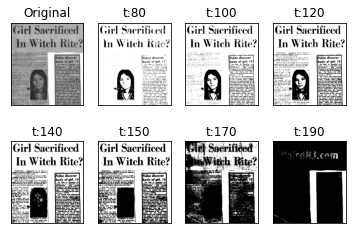

In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread(path+'scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
thresholds = [80, 100, 120, 140, 150, 170, 190]
imgs = {'Original' : img}
for t in thresholds:
    _, t_img = cv2.threshold(img, t, 255, cv2.THRESH_BINARY) 
    imgs['t:%d'%t] = t_img

for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 4, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()


- 위 임계값 중에서는 120 ~ 140 사이일 때가 가장 선명하다는 것을 알 수 있다.

**threshold_adapted.py**

방금 배운 스레시홀딩이 매번 좋은 성능을 내는 거은 아니다. 원본 이미지에서 조명이 일정하지 않거나 배경색이 여러 개인 경우 하나의 임계값으로 선명한 바이너리 이미지를 만들어내기 힘들 수도 있다.

그럴때 이미지를 여러 영역으로 나눈 후, 그 주변 픽셀 값만 활용하여 임계값을 구하는 방식을 적응형 스레시홀딩이라고 한다.

- cv2.adaptiveThreshold()

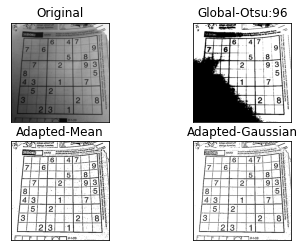

In [16]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('../img/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

오츠의 알고리즘을 적용하여 얻은 결과는 밑 부분이 검정색으로 타버린 것을 확인할 수 있다. 적응형 쓰레시홀드를 이용하면 좋은 결과들을 얻은 것을 확인할 수 있다.

**arithmatic.py**

사칙연산

In [17]:
import cv2
import numpy as np

# ---① 연산에 사용할 배열 생성
a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

#---② NumPy 배열 직접 연산
add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

# ---③ OpenCV API를 이용한 연산
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

#---④ 각 연산 결과 출력
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


- 이미지에서는 0보다 작은 값도 0이라고 표기

**arithmatic_mask.py**

In [27]:
import cv2
import numpy as np

#---① 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
print('a : ',a)
b = np.array([[10, 20]], dtype=np.uint8)
print('b : ',b)
#---② 2번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

#---③ 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
# c1의 결과에서 b.copy를 기준으로 첫번째만 적용
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

a :  [[1 2]]
b :  [[10 20]]
[[11  0]]
[[11 20]] [[10 20]]


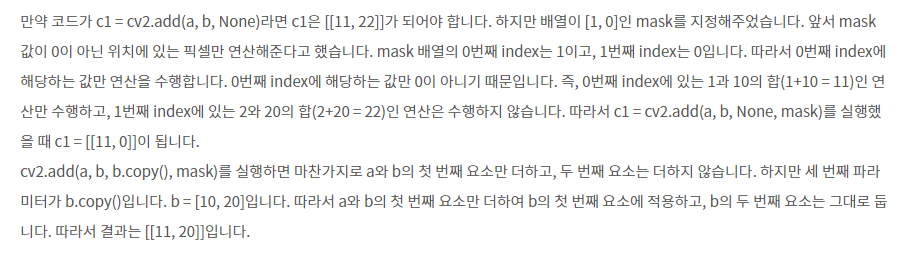

- mask는 0이 아닌 위치에 있는 픽셀만 연산해준다.

**blending_simple.py**

두 영상 합성

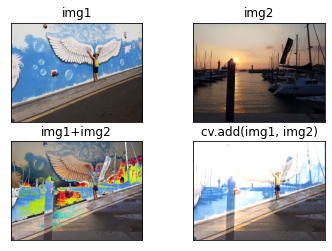

In [19]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# ---① 연산에 사용할 이미지 읽기
img1 = cv2.imread('../img/wing_wall.jpg')
img2 = cv2.imread('../img/yate.jpg')

# ---② 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# ---③ 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

그냥 더해주는거라서 결과값이 좋지 않다. 따라서 가중치에 따라 픽셀값을 조정해주어야한다. 영상의 가중치를 알파값이라고 부른다.

**blending_alpha.py**

- cv2.addWeight(img1, alpha, img2, beta, gamma)
- img1, img2 : 합성할 두 영상
- alpha : img1에 지정할 가중치
- beta : img2에 지정할 가중치
- gamma : 연산 결과에 가감할 상수

In [20]:
import cv2
import numpy as np

alpha = 0.5 # 합성에 사용할 알파 값

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('../img/wing_wall.jpg')
img2 = cv2.imread('../img/yate.jpg')

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) 
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 합성이 안 예쁜거 같아서 addWeight를 이용하여 가중치 추가

페이드 인 아웃 기법으로 영사이 전환되는 장면에서 주로 사용된다.

**blending_alpha_trackbar.py**

In [30]:
import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('../img/man_face.jpg')
img2 = cv2.imread('../img/lion_face.jpg')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
# 100 이상으로는 다 똑같은 그림을 가짐
cv2.createTrackbar(trackbar_name, win_name, 0, 130, onChange) 

cv2.waitKey()
cv2.destroyAllWindows()

#### 비트와이즈 연산
OpenCV를 활용해 두 이미지의 비트 단위 연산을 할 수 도 있다. 비트와이즈 연산은 두 이미지를 합성할 때 특정 영역만 선택하거나 특정 영역만 제거하는 등의 선별적인 연산에 도움이 된다.

**bitwise.py**

- 여기 mask 옵션도 0이 아닌 픽셀만 연산하게 한다.

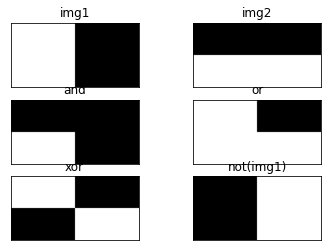

In [31]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros( (200,400), dtype=np.uint8)
img2 = np.zeros( (200,400), dtype=np.uint8)
img1[:, :200] = 255         # 왼쪽은 검정색(0), 오른쪽은 흰색(255)
img2[100:200, :] = 255      # 위쪽은 검정색(0), 아래쪽은 흰색(255)

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

**bitwise_masking.py**

In [32]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('../img/girl.jpg')

#--② 마스크 만들기
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

**diff_absolute.py**


- 두 이미지의 차이를 나타냄
- 두 이미지를 그냥 빼면 음수가 나올 수 있으니 절대 값의 차를 구하는 함수를 이용하여 연산을 한다.

In [24]:
import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('../img/robot_arm1.jpg')
img2 = cv2.imread('../img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

**addition_rgbr_mask.py**


- 두 이미지 합성

In [33]:
import cv2
import numpy as np

#--① 합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('../img/girl.jpg')

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows() 

**hsv_color_mask.py**

- cv2.inRange() : 범위에 속하지 않는 픽셀 판단

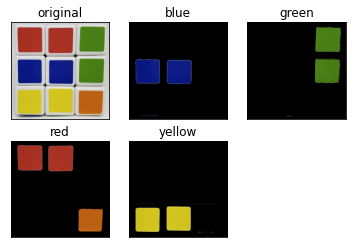

In [26]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("../img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

크로마 키의 원리

**chromakey.py**

In [27]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 크로마키 배경 영상과 합성할 배경 영상 읽기
img1 = cv2.imread('../img/man_chromakey.jpg')
img2 = cv2.imread('../img/street.jpg')

#--② ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

#--③ 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

#--④ 크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#--⑤ 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

#--⑥ 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

#--⑦ 결과 출력
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

얘네는 근데 적절한 하이퍼 파라미터를 찾아줘야 한다. 따라서 그걸 신경쓰지 않고 하는 작업을 해볼 것이다.

#### seamlessclone.py

- cv2.seamlessclone(src, dst, mask, coords, flags)
- src : 입력 영상, 일반적으로 전경
- dst : 대상 영상, 일반적으로 배경
- mask : 마스크, 합성하고자 하는 영역
- coords : src가 놓여지기 원하는 dst 좌표
- falgs : 합성 방식
    
    
    
    
    
    
합성 방식에는 두 가지가 있습니다.
- NORMAL_CLONE : 입력 원본 유지
- MIXED_CLONE : 입력과 대상을 혼합
    
MIXED_CLONE 옵션을 주게 되면 조금 더 자연스러운 처리가 가능합니다.

import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("../img/jjang3.jpg")
img2= cv2.imread("../img/my_hand.jpg")

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#--⑤ 결과 출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램

#### hist_gray.py

히스토그램을 계산하고 표시하는 방법으로는 다음 함수를 쓰면 된다.

- cv2.calcHist(img, channel, mask, histSize, ranges)
- img : 이미지, 리스트로 감싸서 표현
- channel : 처리할 채널, 리스트로 감싸서 표현
- mask : 마스크에 지정한 픽셀만 히스토그램에 계산
- histSize : 계급의 개수, 채널 개수에 맞게 리스트로 표현
- range : 각 픽셀이 가질 수 있는 값의 범위

hist.shape: (256, 1)
hist.sum(): 270000.0 img.shape: (450, 600)


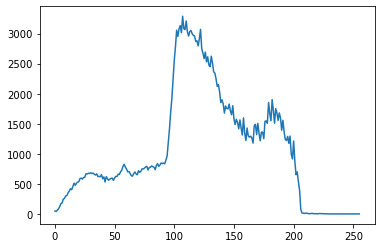

In [48]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 그레이 스케일로 읽기 및 출력
img = cv2.imread('../img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

#--② 히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,255])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) #--④ 히스토그램 총 합계와 이미지의 크기
plt.show()


총 270000개의 픽셀값을 시각화함을 볼 수 있다. 위 mountain 사진에서는 흰색이 거의 없음을 살펴볼 수 있다.

#### hist_rgb.py

이번엔 색상 이미지의 히스토그램을 살펴보자. grayscale 하지 않고 각 색의 숫자 분포를 살펴보자.

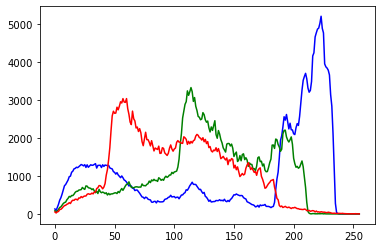

In [3]:
# 색상 이미지 히스토그램 (histo_rgb.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('../img/mountain.jpg')
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img) # chnnnel이 분리된다.
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

#### hist_normalize.py

노말라이즈 연산을 이용하여 같은 기준에서 값을 도출해낸다.

- cv2.normalize(src, dst, alpha, beta, type_flag)

flag 종류만 보면 다음과 같다.
- cv2.NORM_MINMAX : alpha와 beta 구간으로 노말라이즈
- cv2.NORM_L1 : 전체 합을 나뉘, alpha = 노말라이즈 전체 합
- cv2.NORM_L2 : 단위 벡터로 노말라이즈
- cv2.NORM_INF : 최대 값으로 나누기

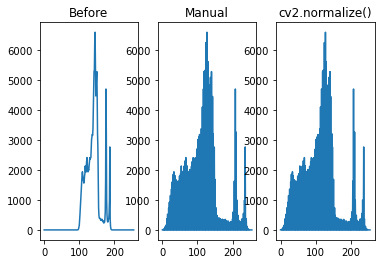

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 그레이 스케일로 영상 읽기
img = cv2.imread('../img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

#--② 직접 연산한 정규화
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

#--③ OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#--④ 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)
cv2.waitKey()
cv2.destroyAllWindows()

hists = {'Before' : hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

정규화 전에는 픽셀 값이 중앙에 몰려 있는 모습을 확인할 수 있는데, 정규화를 적용하면 분산되어 화질이 개선된 것을 볼 수 있다.

#### hist_equalize.py

###### 평탄화?!
평탄화는 각각의 값이 전체 분포에 차지하는 비중에 따라 분포를 재분배하므로 명암 대비를 개선하는데 효과적이다.

히스토그램이 특정 영역에 집중되어 있으면 명암 대비가 낮아 좋은 이미지라고 할 수 없다. 전체 영역에 골고루 분포가 되어 있을 때 좋은 이미지라고 할 수 있다.

(256,)


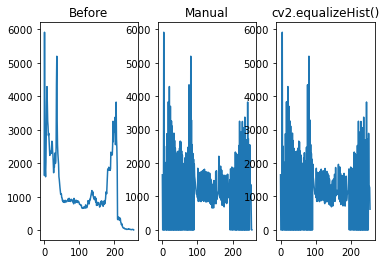

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 대상 영상으로 그레이 스케일로 읽기
img = cv2.imread('../img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum()                    # 누적 히스토그램 
# 0(zero)인 값을 NaN으로 제거, 불필요한 연산을 줄이기 위해
cdf_m = np.ma.masked_equal(cdf, 0)                      
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑

#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
cv2.waitKey()
cv2.destroyAllWindows()

hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

#### histo_equalize_yuv.py

YUV 컬러스페이스로 변경한 이미지에 대하여도 평탄화를 적용시킬 수 있다,

In [6]:
import numpy as np, cv2

img = cv2.imread('../img/yate.jpg') #이미지 읽기, BGR 스케일

#--① 컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 

#--② YUV 컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

#--③ 컬러 스케일을 YUV에서 BGR로 변경
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

밝기 채널에 평탄화를 적용한 예제이다. 사진을 보면 다음과 같이 밝기가 더 개선되어 화질이 좋아진 것을 확인하 수 있다.

평탄화의 단점. 이미지의 밝은 부분이 날아가는 현상..


이런 현상을 막기 위해 이미지를 일정한 영역으로 나누어 평탄화를 적용한다. 지정된 제한값을 넘으면 다른 영역에 균일하게 배분하여 적용하는 방식을 **clahe**라고 한다.

#### histo_clahe.py

CLAHE(Contrast Limiting Adaptive Histogram Equalization)

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread('../img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

#### histo_2d.py

1차원 히스토그램은 이미지 안에 픽셀이 각각 몇 개인지 표현한다. 반면, 2차원 히스토그램은 축이 2개이고 각 축이 만나는 지점의 개수를 표현한다.

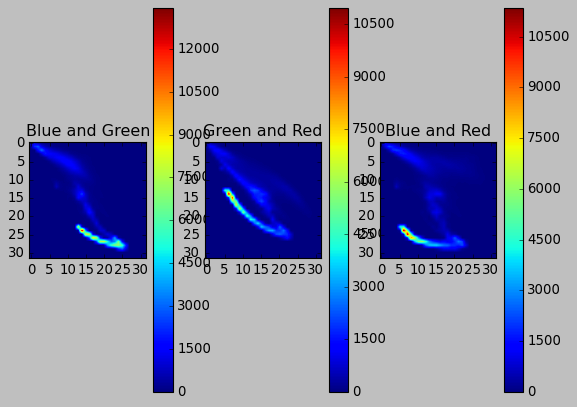

In [3]:
import cv2
import matplotlib.pylab as plt

#plt.style.use('classic')            # --①컬러 스타일을 1.x 스타일로 사용
img = cv2.imread('../img/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256]) #--②
p = plt.imshow(hist)                                            #--③
plt.title('Blue and Green')                                     #--④
plt.colorbar(p)                                                 #--⑤


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256]) #--⑥
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256]) #--⑦
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

#### histo_backproject.py

역투영. 관심 영역의 히스토그램과 유사한 히스토그램을 갖는 영역을 찾아내는 기법이다.

단점. 잔디와 비슷한 색상을 가진 다른 물체가 있는 경우 성능이 떨어진다.

In [53]:
# 마우스로 선택한 영역의 물체 분리하기 (histo_backproject.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('../img/jjang4.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

#--⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #--⑨ 비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    # 비율은 1을 넘어서는 안되기 때문에 1을 넘는 수는 1을 갖게 함
    bp = np.minimum(bp, 1)
    # 1차원 배열을 원래의 shape로 변환
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')
 
# OpenCV API로 구현한 함수 ---⑪ 
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬ 
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    # 빨간 사각형으로 ROI 영역 표시
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

#### hist_compare.py

- 유사성을 측정하는 메서드로는 다음이 있다.
- cv2.HISTCMP_CORREL : 상관관계(1 : 완전 일치, -1 : 최대 불일치, 0 : 무관계)
- cv2.HISTCMP_CHISQR : 카이제곱 상관관계(0 : 일치, 큰 값 : 최대 불일치)
- cv2.HISTCMP_INTERSECT : 교차(1 : 완전 일치, 0 : 최대 불일치)
등등

CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


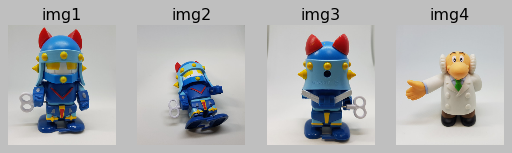

In [5]:
# 히스토그램 비교 (histo_compare.py)

import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('../img/taekwonv1.jpg')
img2 = cv2.imread('../img/taekwonv2.jpg')
img3 = cv2.imread('../img/taekwonv3.jpg')
img4 = cv2.imread('../img/dr_ochanomizu.jpg')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

#### workshop_two_face.py

In [1]:
import cv2
import numpy as np

# 영상의 15%를 알파 블렌딩의 범위로 지정
alpha_width_rate = 15

# 합성할 두 영상 읽기
img_face = cv2.imread('../img/man_face.jpg')
img_skull = cv2.imread('../img/skull.jpg')

# 입력 영상과 같은 크기의 결과 영상 준비
img_comp = np.zeros_like(img_face)

# 연산에 필요한 좌표 계산
height, width = img_face.shape[:2]
middle = width//2                             # 영상의 중앙 좌표
alpha_width = width * alpha_width_rate // 100 # 알파 블렌딩 범위
start = middle - alpha_width//2               # 알파 블렌딩 시작 지점
step = 100/alpha_width                        # 알파 값 간격

# 입력 영상의 절반씩 복사해서 결과 영상에 합성
img_comp[:, :middle, : ] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)

# 알파 값을 바꾸면서 알파 블렌딩 적용
for i in range(alpha_width+1 ):
    alpha = (100 - step * i) / 100  # 증감 간격에 따른 알파 값 (1~0)
    beta = 1 - alpha                # 베타 값 (0~1)
    # 알파 블렌딩 적용
    img_comp[:, start+i] = img_face[:, start+i] * \
                                alpha + img_skull[:, start+i] * beta
    print(i, alpha, beta)
    
cv2.imshow('half skull', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0